# Load Libraries

In [ ]:
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

enable_graphs = True

# Load Data

In [ ]:
if exists('./data/cleaned_car_prices.csv'):
    pass
else:
    input_file = './data/car_prices.csv'
    output_file = './data/screened_car_prices.csv'
    expected_fields = 16

    # Create a screened CSV file
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            if len(row) == expected_fields:
                writer.writerow(row)

# Load the cleaned file into a Pandas DataFrame
df = pd.read_csv('./data/screened_car_prices.csv')

df.info()
print()
print("First 5 rows:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB

First 5 rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Missing Values

In [ ]:
if exists('./data/cleaned_car_prices.csv'):
    pass
else:    
    # Check for missing values
    missing_values = pd.DataFrame({
        'Num of Missing Values' : df.isnull().sum(), 
        'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2)
    })

    if enable_graphs:
        display(missing_values)

    # Drop missing values
    df = df.dropna(subset=['make','model', 'trim', 'body', 'odometer', 'color', 'interior', 'transmission', 'condition'])

    # Double check for missing values
    missing_values_drop = pd.DataFrame({
        'Num of Missing Values' : df.isnull().sum(),
        'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2)
    })

    if enable_graphs:
        display(missing_values_drop)
        df.info()

    # Write cleaned data to a new csv
    output_file = './data/cleaned_car_prices.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')

,Num of Missing Values,Percentage of Missing Values
year,0,0.00
make,10301,1.84
model,10399,1.86
trim,10651,1.91
body,13195,2.36
transmission,65353,11.70
vin,0,0.00
state,0,0.00
condition,11794,2.11
odometer,94,0.02


,Num of Missing Values,Percentage of Missing Values
year,0,0.0
make,0,0.0
model,0,0.0
trim,0,0.0
body,0,0.0
transmission,0,0.0
vin,0,0.0
state,0,0.0
condition,0,0.0
odometer,0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472336 non-null  int64  
 1   make          472336 non-null  object 
 2   model         472336 non-null  object 
 3   trim          472336 non-null  object 
 4   body          472336 non-null  object 
 5   transmission  472336 non-null  object 
 6   vin           472336 non-null  object 
 7   state         472336 non-null  object 
 8   condition     472336 non-null  float64
 9   odometer      472336 non-null  float64
 10  color         472336 non-null  object 
 11  interior      472336 non-null  object 
 12  seller        472336 non-null  object 
 13  mmr           472336 non-null  int64  
 14  sellingprice  472336 non-null  int64  
 15  saledate      472336 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 61.3+ MB


In [ ]:
if enable_graphs:
    # Print the name and count for the 'make' column
    make_counts = df['make'].value_counts()
    print("Make counts:")
    print(make_counts)
    print("\n")

    # Print the name and count for the 'model' column
    model_counts = df['model'].value_counts()
    print("Model counts:")
    print(model_counts)
    print("\n")

    # Print the name and count for the 'trim' column
    trim_counts = df['trim'].value_counts()
    print("Trim counts:")
    print(trim_counts)
    print("\n")

    # Convert the 'body' column to title case (each word starts with an uppercase letter)
    df['body'] = df['body'].str.title()
    # Print the name and count for the 'body' column
    body_counts = df['body'].value_counts()
    print("Body counts:")
    print(body_counts)
    print("\n")

    # Print the name and count for the 'color' column
    color_counts = df['color'].value_counts()
    print("Color counts:")
    print(color_counts)
    print("\n")
    
    # Print the name and count for the 'interior' column
    interior_counts = df['interior'].value_counts()
    print("Interior counts:")
    print(interior_counts)
    print("\n")


Make counts:
make
Ford             81014
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27183
Honda            24781
Hyundai          18663
BMW              17509
Kia              15830
Chrysler         15135
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley         

## Data Analysis

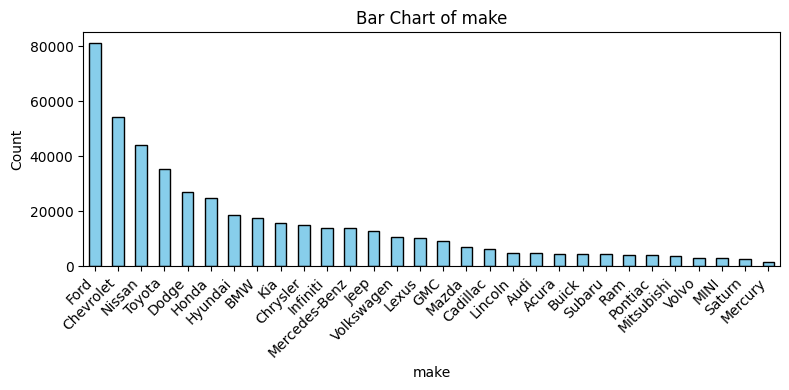

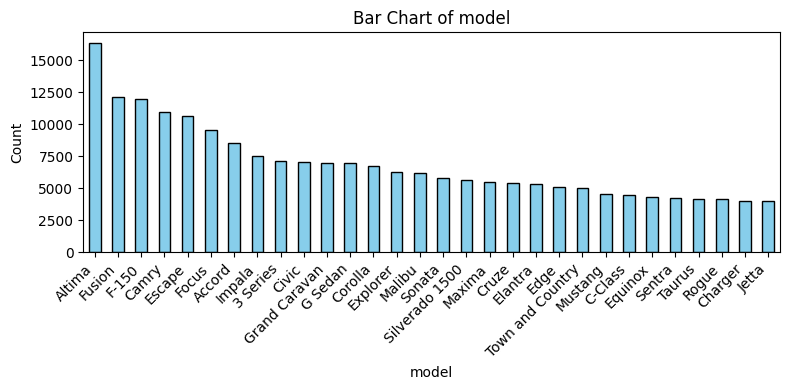

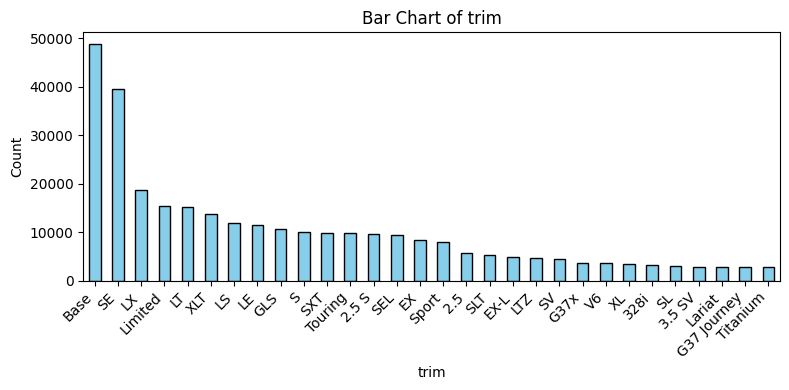

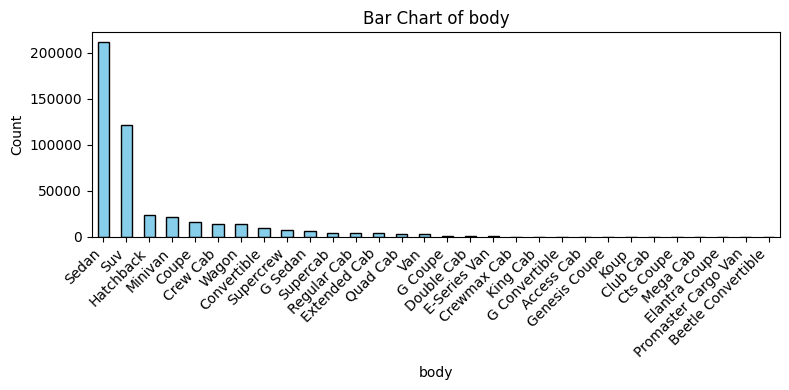

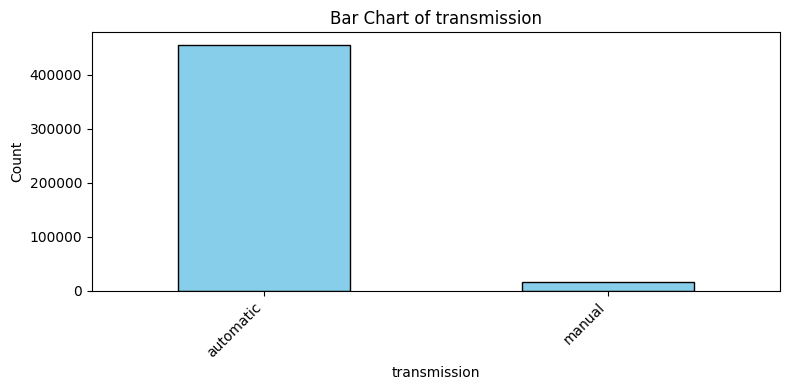

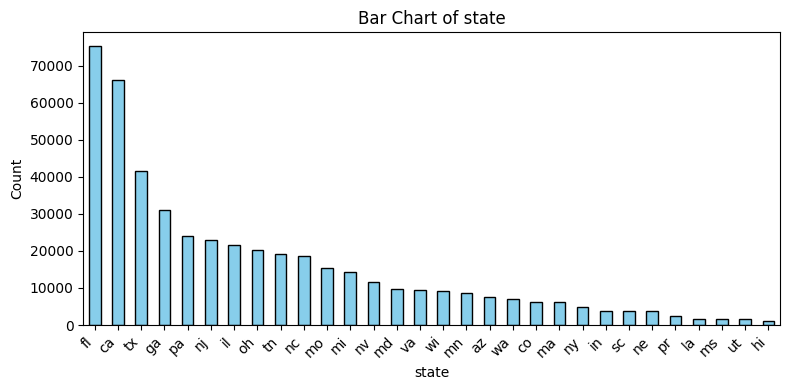

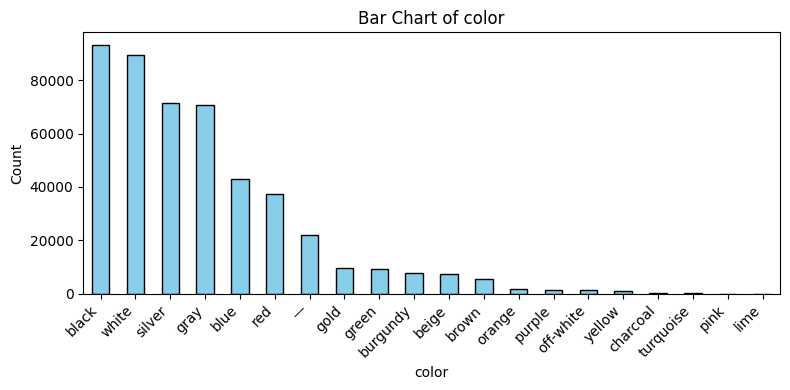

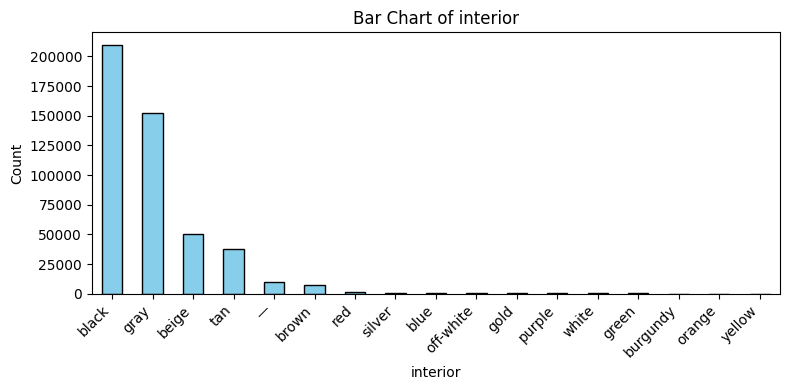

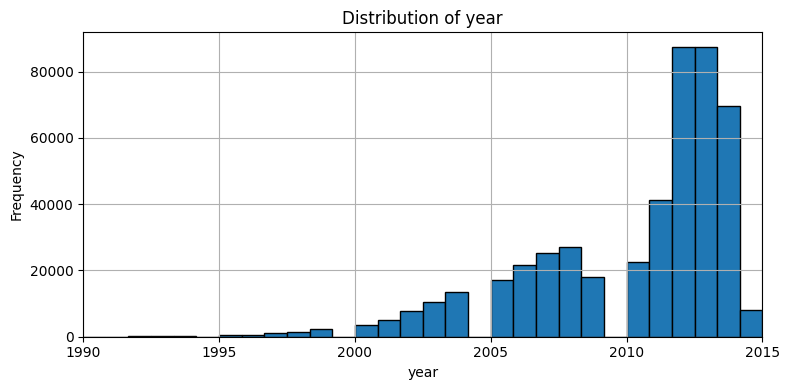

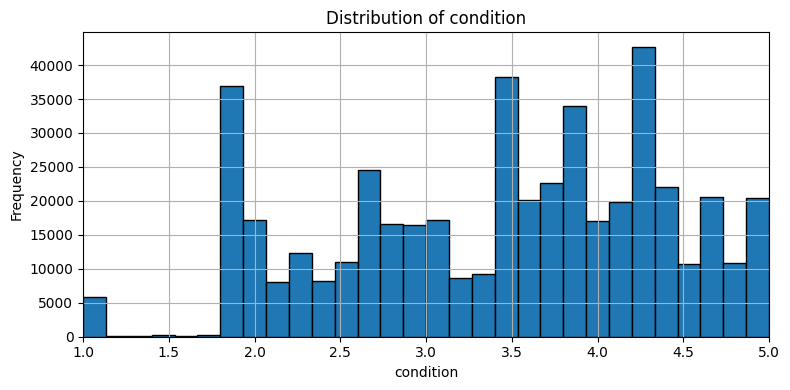

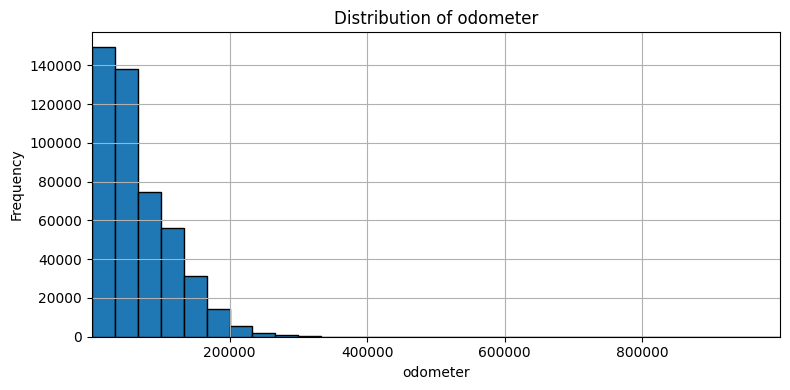

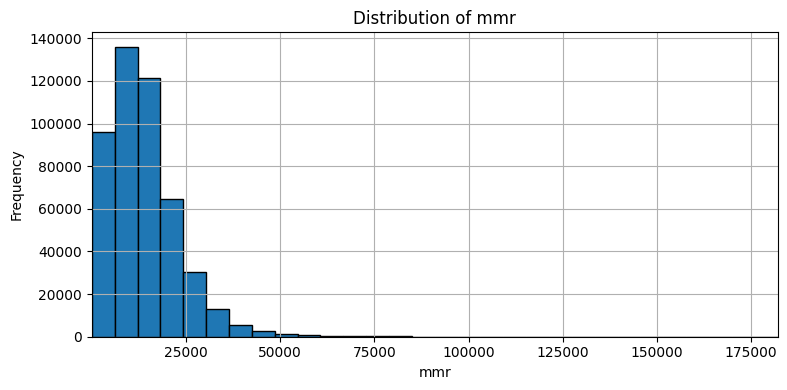

In [ ]:
if enable_graphs:
    # List of columns for bar charts (categorical columns)
    categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

    # List of columns for histograms (numeric columns)
    numeric_features = ['year', 'condition', 'odometer', 'mmr']


    # Create bar charts for each categorical column
    for column in categorical_features:
        plt.figure(figsize=(8, 4))
        df[column].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Create histograms for each numeric column
    for column in numeric_features:
        plt.figure(figsize=(8, 4))
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(left=df[column].min(), right=df[column].max())  # Set x-axis limits
        plt.tight_layout()
        plt.show()

## Correlation Analysis

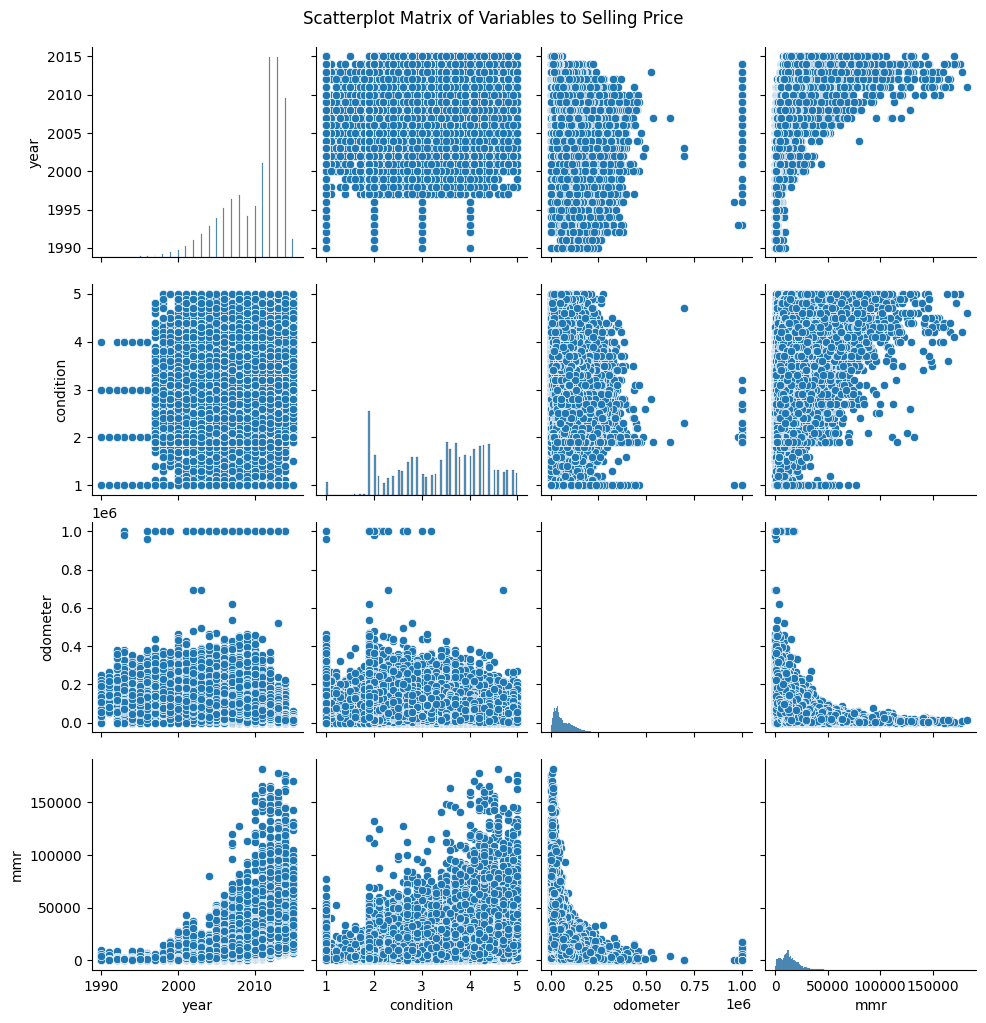

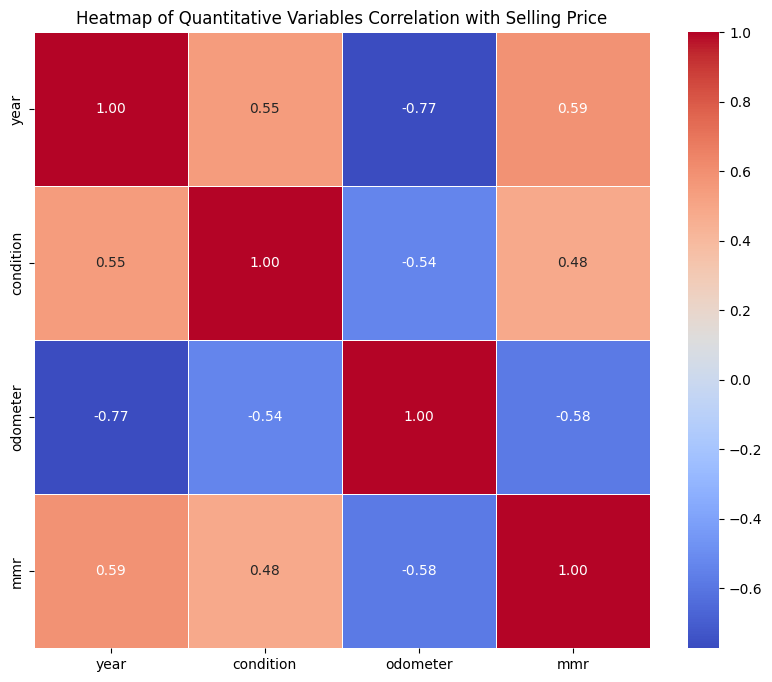

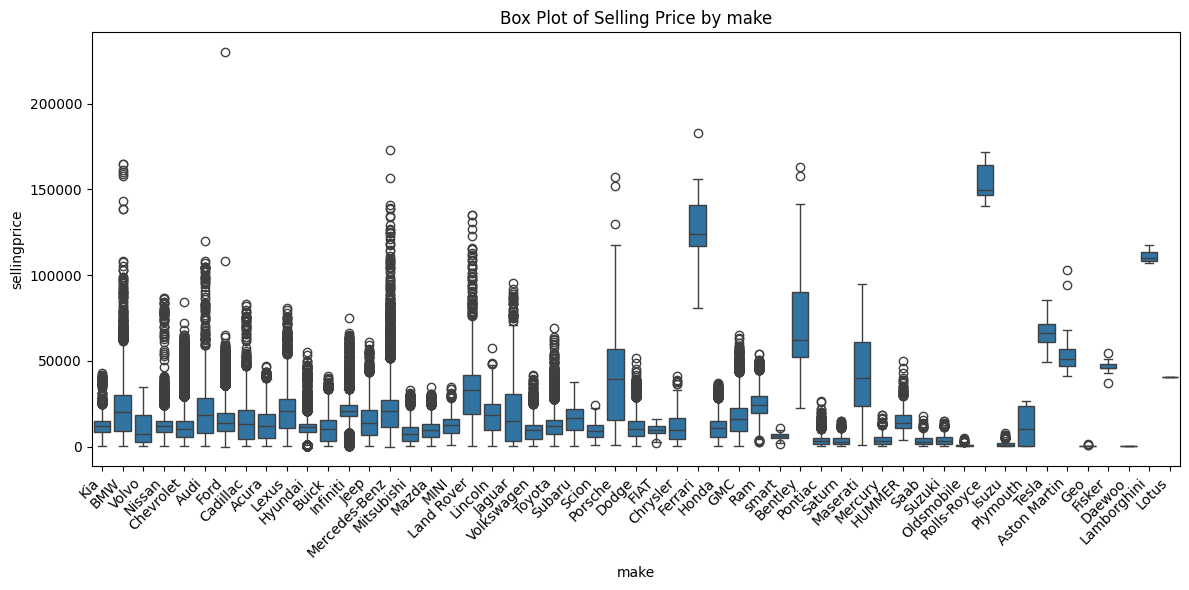

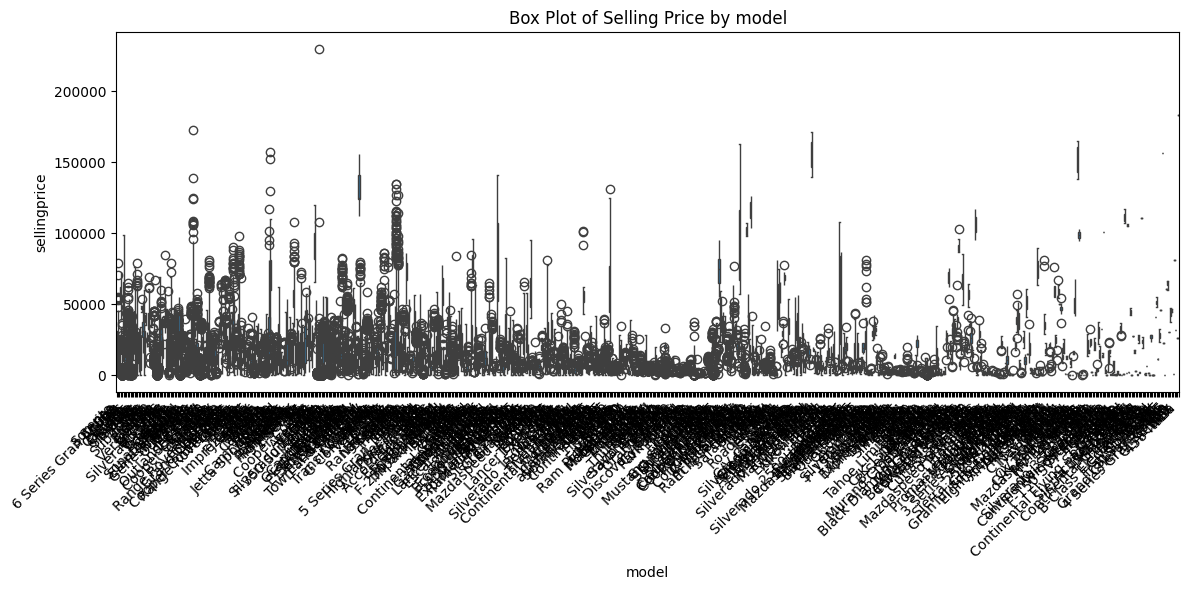

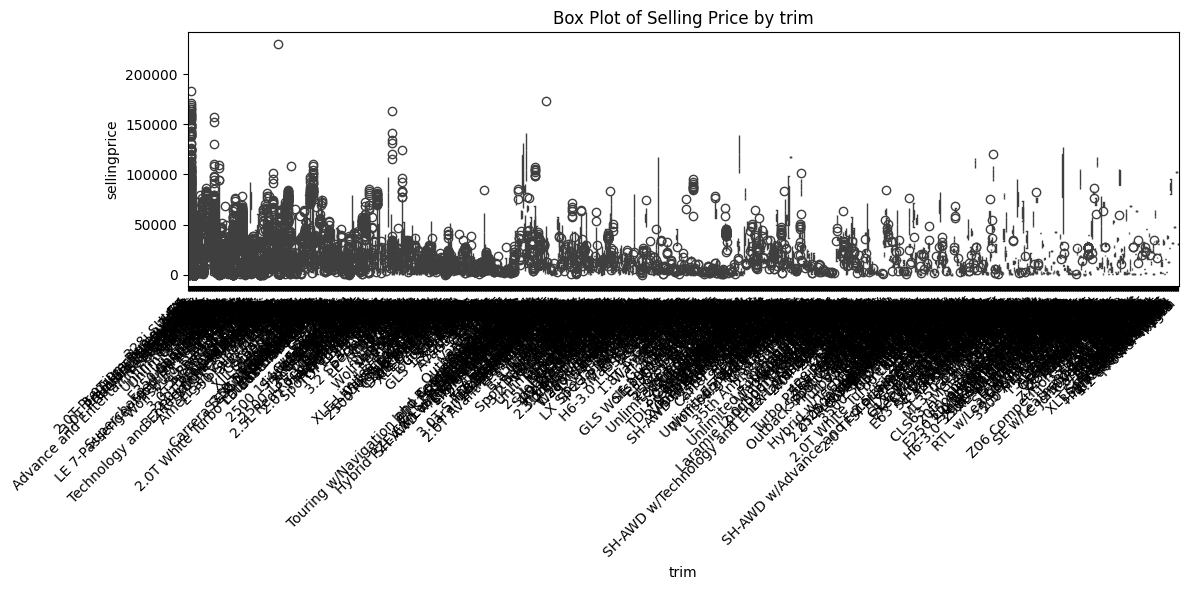

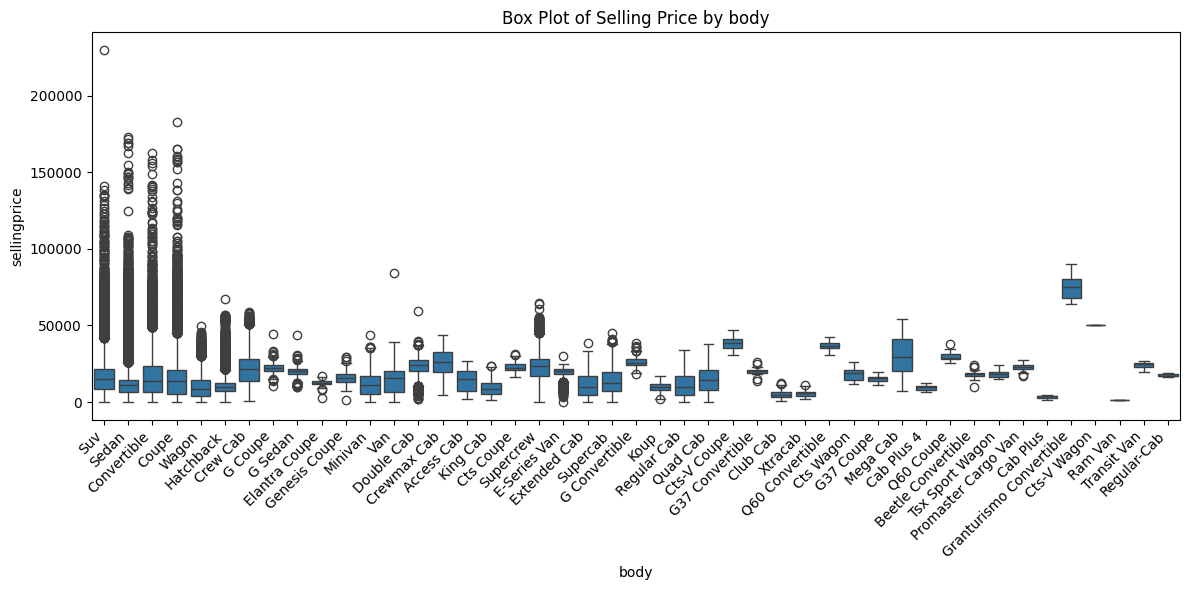

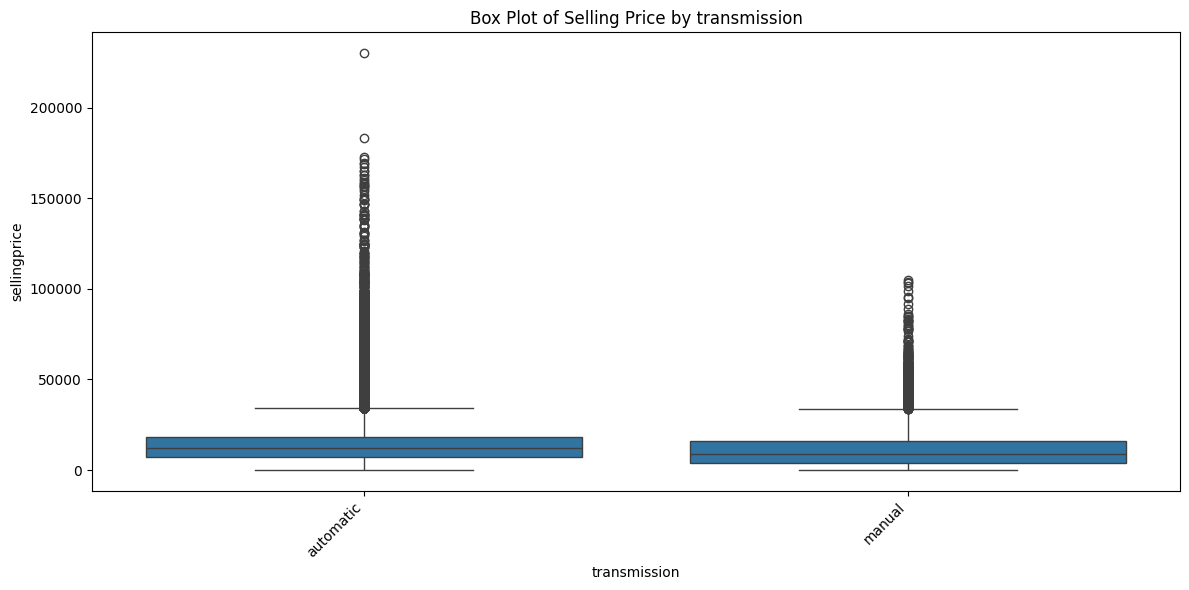

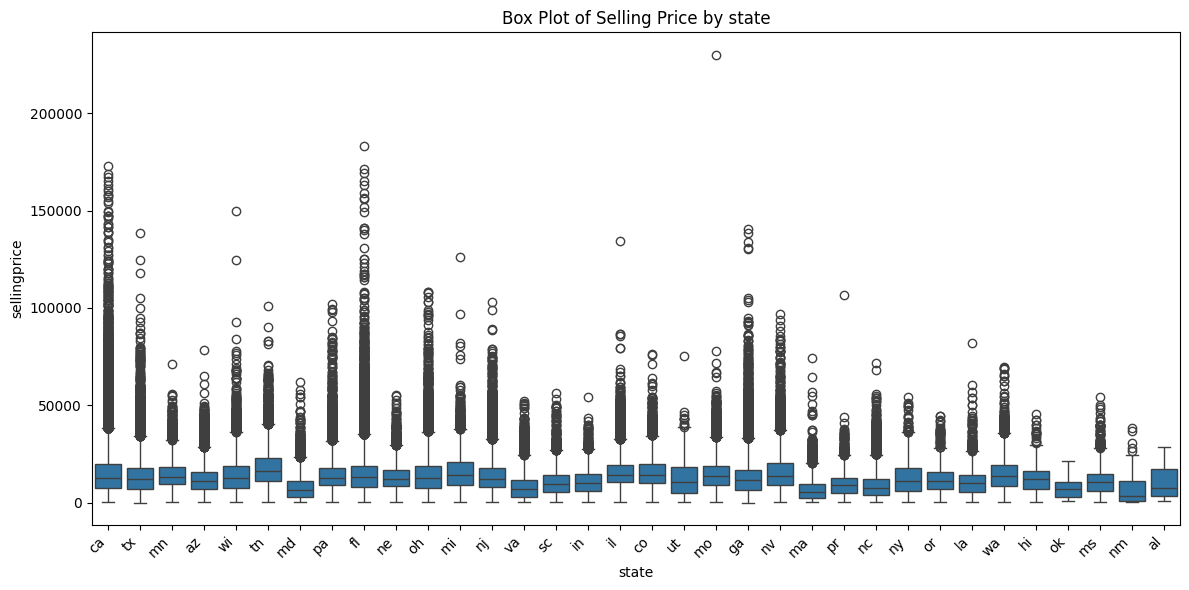

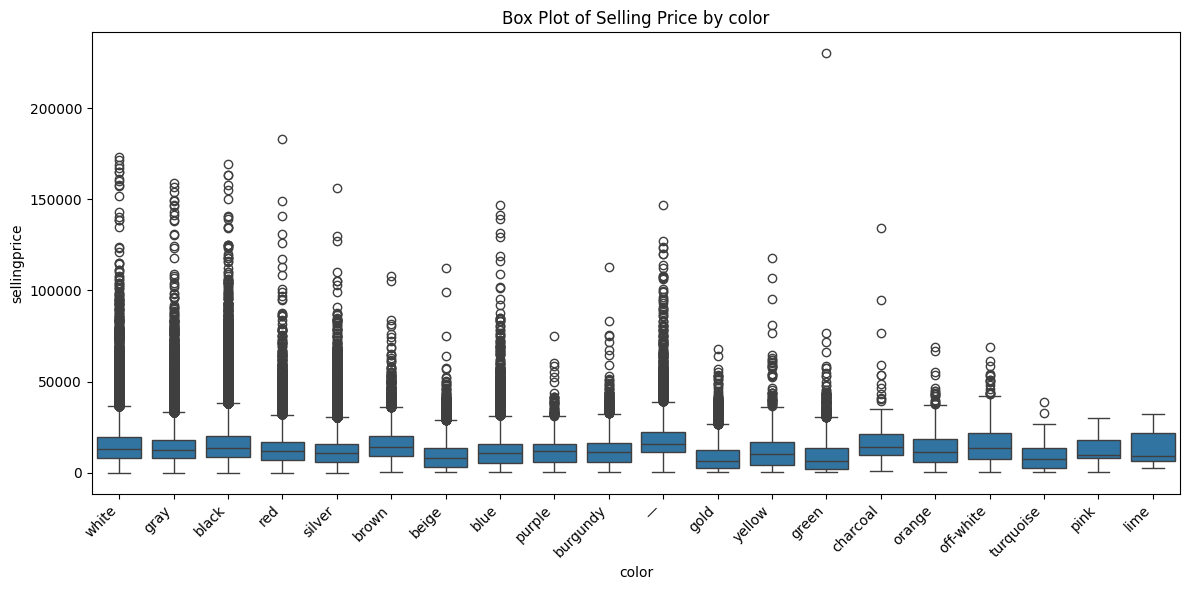

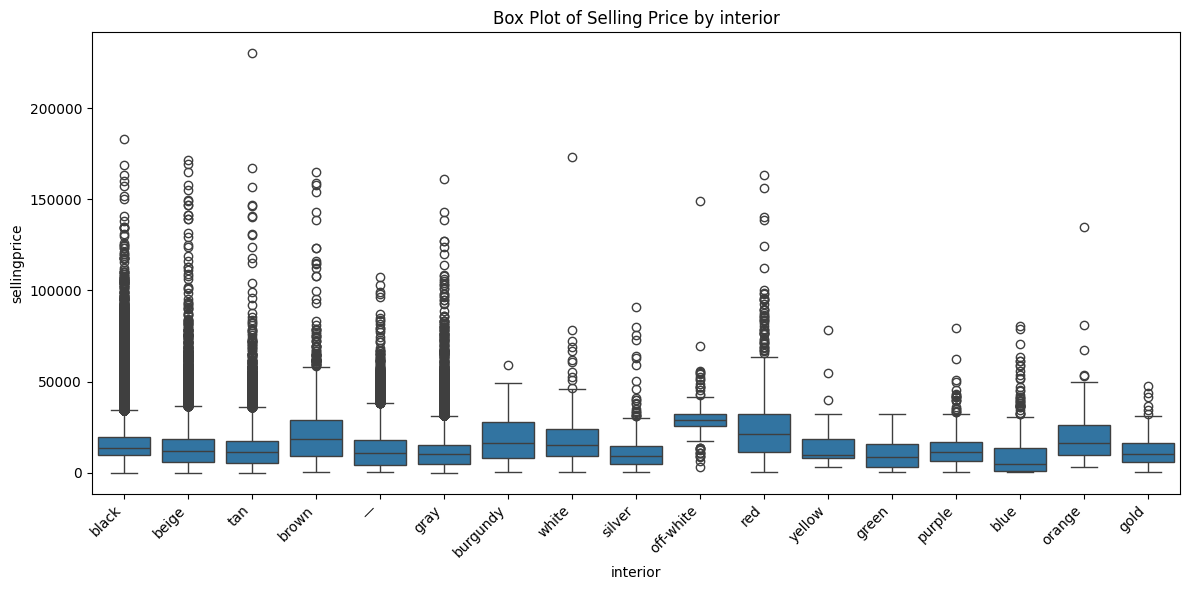

In [ ]:
if enable_graphs:
    # Select relevant columns (you can adjust this list based on your needs)
    scatter_matrix_data = df[numeric_features]

    # Create a scatterplot matrix (pairplot)
    sns.pairplot(scatter_matrix_data)
    plt.suptitle('Scatterplot Matrix of Variables to Selling Price', y=1.02)
    plt.show()

    correlation_data = df[numeric_features]

    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)

    # Set the title
    plt.title('Heatmap of Quantitative Variables Correlation with Selling Price')
    plt.show()

    # Create box plots for each categorical variable against sellingprice
    for column in categorical_features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=column, y='sellingprice', data=df)
        plt.title(f'Box Plot of Selling Price by {column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Adding Features

In [ ]:
# Define a mapping function for the broader categories
def group_body_type(body):
    if 'sedan' in body.lower():
        return 'Sedan'
    elif 'suv' in body.lower():
        return 'SUV'
    elif 'hatchback' in body.lower():
        return 'Hatchback'
    elif 'coupe' in body.lower():
        return 'Coupe'
    elif any(cab in body.lower() for cab in ['crew cab', 'extended cab', 'regular cab', 'quad cab', 'king cab', 'double cab', 'mega cab', 'cab plus']):
        return 'Cab'
    elif 'wagon' in body.lower():
        return 'Wagon'
    elif 'convertible' in body.lower():
        return 'Convertible'
    elif 'van' in body.lower():
        return 'Van'
    else:
        return 'Other'

def add_features_to(df):
    # Apply the mapping to the 'body' column
    df['grouped_body'] = df['body'].apply(group_body_type)

    # Convert the 'salesdate' column to datetime
    df['saledate_replaced'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')

    # Calculate the vehicle's age
    df['vehicle_age'] = df['saledate_replaced'].dt.year - df['year'] + 1

    # Define allowed colors and replace all non-allowed with 'Other
    allowed_colors = ['black', 'white', 'silver', 'grey', 'blue', 'red']
    df['color_replaced'] = df['color'].apply(lambda x: x if x in allowed_colors else 'Other')
    
    # Define allowed interiors and replace all non-allowed with 'Other
    allowed_interiors = ['black', 'grey', 'beige', 'tan']
    df['interior_replaced'] = df['interior'].apply(lambda x: x if x in allowed_interiors else 'Other')
    
    return df

# Load the feature extracted files if they've already been generated
if exists('./data/train.csv'):
    train_df = pd.read_csv("./data/train.csv")
else:
    # Load dataset
    train_df = pd.read_csv('./data/cleaned_car_prices.csv')
    
    # Add feature
    train_df = add_features_to(train_df)

    # Save feature-processed data for later use
    train_df.to_csv("./data/train.csv", index=False)

C:\Users\etanm\AppData\Local\Temp\ipykernel_13416\1733709397.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate_replaced'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')


# Post-Feature Adding Stats

In [ ]:
# Summarize the counts for the new categories
grouped_body_counts = train_df['grouped_body'].value_counts()
print("Grouped Body Counts:")
print(grouped_body_counts)
print("\n")

# Print the name and count for the 'color' column
color_replaced_counts = train_df['color_replaced'].value_counts()
print("Color counts:")
print(color_replaced_counts)
print("\n")

# Print the name and count for the 'interior' column
interior_replaced_counts = train_df['interior_replaced'].value_counts()
print("Interior counts:")
print(interior_replaced_counts)
print("\n")

# Print the name and count for the 'interior' column
vehicle_age_counts = train_df['vehicle_age'].value_counts()
print("Vehicle Age counts:")
print(vehicle_age_counts)
print("\n")

Grouped Body Counts:
grouped_body
Sedan          218247
SUV            120968
Cab             27804
Van             26633
Hatchback       23821
Coupe           17999
Wagon           14264
Other           12854
Convertible      9746
Name: count, dtype: int64




KeyError: 'color_replaced'

# Modeling

In [ ]:
X = train_df.drop(columns=['sellingprice', 'vin', 'saledate', 'color', 'mmr', 'interior', 'transmission', 'body', 'trim',])
#y = train_df['mmr']
y = train_df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


categorical_features_to_use = ['make', 'model',  'grouped_body', 'state', 'color_replaced', 'seller', 'interior_replaced', ]
numeric_features_to_use = ['year', 'condition', 'odometer', 'vehicle_age', ]


# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_to_use),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_to_use)
    ]
)

# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions", color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
    plt.title(f"Actual vs Predicted Prices ({model_name})")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.show()

## Linear Regression

In [ ]:
# Linear Regressor Pipeline
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
linear_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'condition',
                                                   'odometer', 'vehicle_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model',
                                                   'grouped_body', 'state',
                                                   'color', 'seller',
                                                   'interior', 'trim'])])),
                ('regressor', LinearRegression())])

Linear Regression Model:
Mean Squared Error: 9842735.709835175
Root Mean Squared Error: 3137.3134541889776
Mean Absolute Error: 1967.753425498623
R^2 Score: 0.8935465794932422


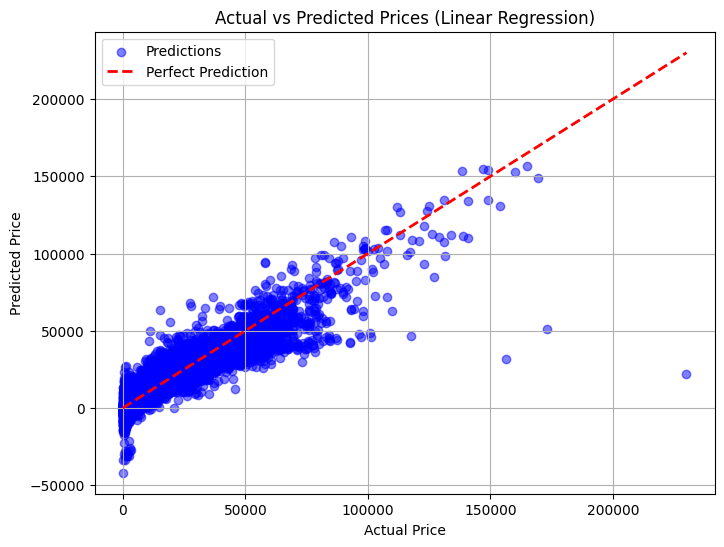

In [ ]:
# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Root Mean Squared Error: {rmse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R^2 Score: {r2_linear}")

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_linear, "Linear Regression")

## Ridge Regression

In [ ]:
# Ridge Regressor Pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the model
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'condition',
                                                   'odometer', 'vehicle_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model',
                                                   'grouped_body', 'state',
                                                   'color', 'seller',
                                                   'interior', 'trim'])])),
                ('regressor', Ridge())])

Ridge Regression Model:
Mean Squared Error: 9719251.588620625
Root Mean Squared Error: 3117.571424782538
Mean Absolute Error: 1956.8853712461648
R^2 Score: 0.8948821133802717


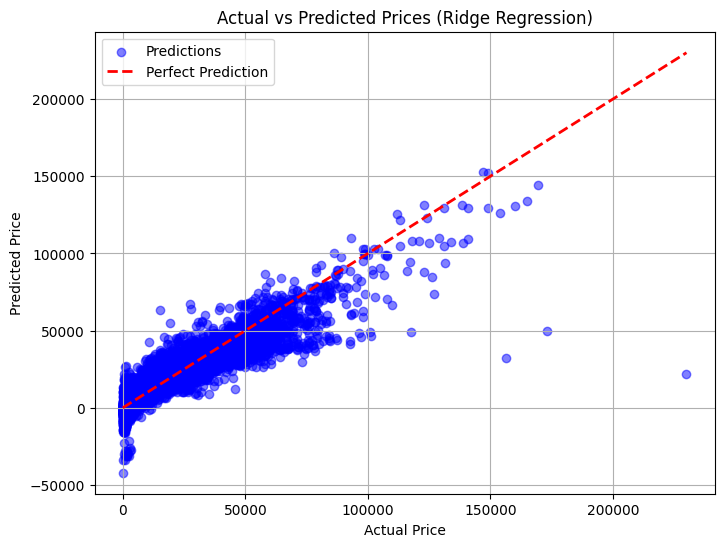

In [ ]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"R^2 Score: {r2_ridge}")

# Plot for Ridge Regression
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge Regression")

## Lasso Regression

In [ ]:
# # Lasso Regressor Pipeline
# lasso_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Lasso(max_iter=10000))
# ])

# # Train the model
# lasso_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_lasso = lasso_model.predict(X_test)

# # Calculate evaluation metrics for Lasso Regression
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# rmse_lasso = mse_lasso ** 0.5
# mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
# r2_lasso = r2_score(y_test, y_pred_lasso)

# print("Lasso Regression Model:")
# print(f"Mean Squared Error: {mse_lasso}")
# print(f"Root Mean Squared Error: {rmse_lasso}")
# print(f"Mean Absolute Error: {mae_lasso}")
# print(f"R^2 Score: {r2_lasso}")

# # Plot for Lasso Regression
# plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso Regression")

## Random Forest Regression

In [ ]:
# # Random Forest Regressor Pipeline
# rf_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
# ])

# # Train the model
# rf_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate the model
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# rmse_rf = mse_rf ** 0.5
# r2_rf = r2_score(y_test, y_pred_rf)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print(f"Random Forest Regressor:")
# print(f"Mean Squared Error: {mse_rf}")
# print(f"Root Mean Squared Error: {rmse_rf}")
# print(f"R^2 Score: {r2_rf}")
# print(f"Mean Absolute Error: {mae_rf}")

# # Plot for Random Forest Regression
# plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest Regressor")

## XGBoost Regression

In [ ]:
# # XGBoost Regressor Pipeline
# xgb_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', XGBRegressor(
#         random_state=42,
#         n_estimators=100,  # Number of boosting rounds
#         learning_rate=0.1,  # Step size shrinkage
#         max_depth=6,        # Maximum depth of trees
#         objective='reg:squarederror'  # Regression loss
#     ))
# ])

# # Train the model
# xgb_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# rmse_xgb = mse_xgb ** 0.5
# r2_xgb = r2_score(y_test, y_pred_xgb)
# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# print(f"XGBoost Regressor:")
# print(f"Mean Squared Error: {mse_xgb}")
# print(f"Root Mean Squared Error: {rmse_xgb}")
# print(f"R^2 Score: {r2_xgb}")
# print(f"Mean Absolute Error: {mae_xgb}")

# # Plot actual vs predicted prices for XGBoost
# plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost Regressor")